<a href="https://colab.research.google.com/github/ashishar/q_character/blob/main/KAN_only_experimental.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!python --version
!pip install pykan

Python 3.10.12


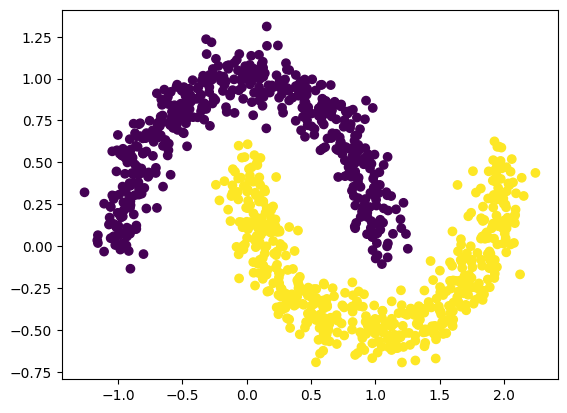

In [2]:
from kan import KAN
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import torch
import numpy as np

dataset = {}
train_input, train_label = make_moons(n_samples=1000, shuffle=True, noise=0.1, random_state=None)
test_input, test_label = make_moons(n_samples=1000, shuffle=True, noise=0.1, random_state=None)

dataset['train_input'] = torch.from_numpy(train_input)
dataset['test_input'] = torch.from_numpy(test_input)
dataset['train_label'] = torch.from_numpy(train_label)
dataset['test_label'] = torch.from_numpy(test_label)

X = dataset['train_input']
y = dataset['train_label']
plt.scatter(X[:,0], X[:,1], c=y[:])

In [3]:
print(len(train_input),len(train_label))
print(len(test_input),len(test_label))
train_input[0]

1000 1000
1000 1000


array([ 1.09407309, -0.55657319])

In [4]:
dataset['train_input'] = torch.from_numpy(train_input)
dataset['test_input'] = torch.from_numpy(test_input)
print(dataset['train_input'].shape)
print(dataset['train_input'][1])
print(dataset['train_label'].shape)


torch.Size([1000, 2])
tensor([-0.7671,  0.4139])
torch.Size([1000])


In [5]:
model = KAN(width=[2,2], grid=3, k=3)

def train_acc():
    return torch.mean((torch.argmax(model(dataset['train_input']), dim=1) == dataset['train_label']).float())

def test_acc():
    return torch.mean((torch.argmax(model(dataset['test_input']), dim=1) == dataset['test_label']).float())

results = model.train(dataset, opt="LBFGS", steps=20, metrics=(train_acc, test_acc), loss_fn=torch.nn.CrossEntropyLoss());

train loss: 0.00e+00 | test loss: 6.64e-06 | reg: 1.25e+02 : 100%|██| 20/20 [00:08<00:00,  2.32it/s]


In [7]:
from google.colab import drive
drive.mount('/content/drive')

# Change directory to the desired location where the file is stored.
%cd /content/drive/MyDrive/


# Import the file named quantum_circuit_simulator.py
#import quantum_circuit_simulator


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive


In [8]:
# prompt: I want to download devanagari character dataset from Kaggle.

#!pip install kaggle
#!mkdir -p ~/.kaggle
#!cp /content/drive/MyDrive/brahmi/kaggle.json ~/.kaggle/kaggle.json
#!kaggle datasets download --force -d gautamneha/brahmi-dataset
!unzip "/content/drive/My Drive/brahmi-dataset.zip" -d "/content/data"

Streaming output truncated to the last 5000 lines.
  inflating: /content/data/test/117/26.jpg  
  inflating: /content/data/test/117/27.jpg  
  inflating: /content/data/test/117/28.jpg  
  inflating: /content/data/test/117/29.jpg  
  inflating: /content/data/test/117/30.jpg  
  inflating: /content/data/test/118/26.jpg  
  inflating: /content/data/test/118/27.jpg  
  inflating: /content/data/test/118/28.jpg  
  inflating: /content/data/test/118/29.jpg  
  inflating: /content/data/test/118/30.jpg  
  inflating: /content/data/test/119/26.jpg  
  inflating: /content/data/test/119/27.jpg  
  inflating: /content/data/test/119/28.jpg  
  inflating: /content/data/test/119/29.jpg  
  inflating: /content/data/test/119/30.jpg  
  inflating: /content/data/test/12/1.jpg  
  inflating: /content/data/test/12/11.jpg  
  inflating: /content/data/test/12/15.jpg  
  inflating: /content/data/test/12/18.jpg  
  inflating: /content/data/test/12/22.jpg  
  inflating: /content/data/test/120/26.jpg  
  inflatin

In [9]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, TensorDataset


# Step 1: Define the transforms for the training and testing data
train_transforms = transforms.Compose([
    transforms.Resize((28, 28)),  # Resize to a common size
    #transforms.Grayscale(num_output_channels=1),
    #transforms.RandomHorizontalFlip(),  # Data augmentation
    transforms.ToTensor(),  # Convert images to PyTorch tensors
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])  # Normalize with ImageNet mean and std
])

test_transforms = transforms.Compose([
    transforms.Resize((28, 28)),  # Resize to a common size
    #transforms.Grayscale(num_output_channels=1),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Step 2: Load the datasets using ImageFolder
train_dataset = datasets.ImageFolder(root='/content/data/train', transform=train_transforms)
test_dataset = datasets.ImageFolder(root='/content/data/test', transform=test_transforms)

train_images = []
train_labels = []

# Iterate through the dataset
for img, label in train_dataset:
    train_images.append(img)
    train_labels.append(label)

# Convert lists to tensors
train_images_tensor = torch.stack(train_images)  # Stacks all image tensors
train_labels = torch.tensor(train_labels)  # Converts label list to tensor

# Define weights for the RGB channels
weights = torch.tensor([0.2989, 0.5870, 0.1140]).view(1, 3, 1, 1)

# Ensure the weights tensor is on the same device as the images tensor
if train_images_tensor.is_cuda:
    weights = weights.cuda()

# Convert RGB to grayscale
train_images = (train_images_tensor * weights).sum(dim=1, keepdim=True)
train_images=  train_images.squeeze(1)

#flatten
train_images = train_images.view(4250, -1)


# Create a train in TensorDataset
train_dataset = TensorDataset(train_images, train_labels)

# Check the shape of the output
# Check the shapes
print(f"Train Images Tensor: {train_images.shape}")  # Expected: [num_samples, channels, height, width]
print(f"Train Labels Tensor: {train_labels.shape}")  # Expected: [num_samples] # Should be [4250, 28, 28]
print("Train_dataset ",len(train_dataset))


test_images = []
test_labels = []

# Iterate through the dataset
for img, label in test_dataset:
    test_images.append(img)
    test_labels.append(label)

# Convert lists to tensors
test_images_tensor = torch.stack(test_images)  # Stacks all image tensors
test_labels = torch.tensor(test_labels)  # Converts label list to tensor

# Convert RGB to grayscale
test_images = (test_images_tensor * weights).sum(dim=1, keepdim=True)
test_images =  test_images.squeeze(1)

#flatten
test_images = test_images.view(850, -1)

# Check the shape of the output
# Check the shapes
print(f"Test Images Tensor: {test_images.shape}")  # Expected: [num_samples, channels, height, width]
print(f"Test Labels Tensor: {test_labels.shape}")  # Expected: [num_samples] # Should be [850, 28,28]

# Create a TensorDataset
test_dataset = TensorDataset(test_images, test_labels)
print("test_dataset ",len(test_dataset))

# # Example: Iterate over the train_loader
# for images, labels in train_loader:
#     print(images.shape, labels.shape)
#     break  # Break after the first batch to show an example

batch_size=64
# # Step 3: Create the data loaders to batch and shuffle the data
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# train_loader=train_loader.squeeze(1)
# test_loader=test_loader.squeeze(1)

Train Images Tensor: torch.Size([4250, 784])
Train Labels Tensor: torch.Size([4250])
Train_dataset  4250
Test Images Tensor: torch.Size([850, 784])
Test Labels Tensor: torch.Size([850])
test_dataset  850


In [10]:
dataset['train_input'] = train_images
print(dataset['train_input'].shape)
dataset['test_input'] = test_images
print(dataset['test_input'].shape)

torch.Size([4250, 784])
torch.Size([850, 784])


In [11]:
dataset['train_labels'] = train_labels#.unsqueeze(dim=1)
print(dataset['train_labels'].shape)

dataset['test_labels'] = test_labels#.unsqueeze(dim=1)
print(dataset['test_labels'].shape)


torch.Size([4250])
torch.Size([850])


In [ ]:
model = KAN(width=[784,20,170], grid=3, k=3)

def train_acc():
    return torch.mean((torch.argmax(model(dataset['train_input']), dim=1) == dataset['train_label']).float())

def test_acc():
    return torch.mean((torch.argmax(model(dataset['test_input']), dim=1) == dataset['test_label']).float())

results = model.train(dataset, opt="LBFGS", steps=20, metrics=(train_acc, test_acc), loss_fn=torch.nn.CrossEntropyLoss());

description:   0%|                                                           | 0/20 [00:00<?, ?it/s]

In [35]:
lib = ['x','x^2','x^3','x^4','exp','log','sqrt','tanh','sin','tan','abs']
model.auto_symbolic(lib=lib)
formula = model.symbolic_formula()[0][0]
formula

fixing (0,0,0) with sin, r2=0.9619013588700557
fixing (0,1,0) with tan, r2=0.979848952239305


0.39*sin(3.13*x_1 + 7.84) - 0.81*tan(0.92*x_2 + 6.03) + 0.47

In [36]:
def acc(formula, X, y):
    batch = X.shape[0]
    correct = 0
    for i in range(batch):
        correct += np.round(np.array(formula.subs('x_1', X[i,0]).subs('x_2', X[i,1])).astype(np.float64)) == y[i,0]
    return correct/batch

print('train acc of the formula:', acc(formula, dataset['train_input'], dataset['train_label']))
print('test acc of the formula:', acc(formula, dataset['test_input'], dataset['test_label']))

train acc of the formula: tensor(0.9970)
test acc of the formula: tensor(0.9990)


In [ ]:
!unzip "/content/drive/My Drive/brahmi-dataset.zip" -d "/content/data"